In [ ]:
import pickle
import numpy as np
import h5py
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import pandas as pd


In [ ]:
dbfile=open('/content/drive/My Drive/Colab Notebooks/aggregatepickle.pkl','rb')
db=pickle.load(dbfile)
dbfile.close()
print(len(db['names']))
print(len(db['encodings']))
print(np.unique(db['names']))

encodings=db['encodings']
names=db['names']
X=np.array(encodings)


print(X.shape)

824
824
['Adarsh' 'Athira' 'Midhun' 'Navami' 'Naveen' 'Oscar' 'Ramdas'
 'Shivatheertha' 'Sruthi']
(824, 128)


In [ ]:
 from sklearn.preprocessing import LabelBinarizer
 encoder = LabelBinarizer()
 transformed_labels2 = encoder.fit_transform(np.unique(db['names']))
 transformed_labels= np.zeros([9,1],dtype=int)
 for i in range(0,9):
   transformed_labels[i]=i
 print(np.unique(db['names']))
 print(transformed_labels.shape)
 print(transformed_labels[0].shape)
 print(transformed_labels)
 Y=np.zeros([824,1],dtype=int)

 for i in range(0,824):
   if names[i]=="Adarsh":
     Y[i]=transformed_labels[0]
   if names[i]=="Athira":
     Y[i]=transformed_labels[1]
   if names[i]=="Midhun":
     Y[i]=transformed_labels[2]
   if names[i]=="Navami":
     Y[i]=transformed_labels[3]
   if names[i]=="Naveen":
     Y[i]=transformed_labels[4]
   if names[i]=="Oscar":
     Y[i]=transformed_labels[5]
   if names[i]=="Ramdas":
     Y[i]=transformed_labels[6]
   if names[i]=="Shivatheertha":
     Y[i]=transformed_labels[7]
   if names[i]=="Sruthi":
     Y[i]=transformed_labels[8]

print(Y[0])
print(names[0])

['Adarsh' 'Athira' 'Midhun' 'Navami' 'Naveen' 'Oscar' 'Ramdas'
 'Shivatheertha' 'Sruthi']
(9, 1)
(1,)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[4]
Naveen


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)
print('Training Features(X) Shape:', x_train.shape)
print('Training Labels(y) Shape:', y_train.shape)
print('Testing Features(X) Shape:', x_test.shape)
print('Testing Labels(y) Shape:', y_test.shape)

Training Features(X) Shape: (494, 128)
Training Labels(y) Shape: (494, 1)
Testing Features(X) Shape: (330, 128)
Testing Labels(y) Shape: (330, 1)


In [ ]:
print(Y.T)
# Distribution of labels is as follows
# 0-82 -> Label 4    || 83 examples
# 83-126 -> Label 8  || 44 examples
# 127-216 -> Label 3 || 90 examples
# 217-358 -> Label 2 || 142 examples
# 359-405 -> Label 7 || 47 examples
# 406-451 -> Label 0 || 46 examples
# 452-497 -> Label 1 || 46 examples
# 498-568 -> Label 5 || 71 examples
# 569-823 -> Label 6 || 255 examples

[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
  8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7
  7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
  7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
print(y_test.T)
c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0
for i in range(len(y_test)):
  if y_test[i]==0:
    c0=c0+1
  if y_test[i]==1:
    c1=c1+1
  if y_test[i]==2:
    c2=c2+1
  if y_test[i]==3:
    c3=c3+1
  if y_test[i]==4:
    c4=c4+1
  if y_test[i]==5:
    c5=c5+1
  if y_test[i]==6:
    c6=c6+1
  if y_test[i]==7:
    c7=c7+1
  if y_test[i]==8:
    c8=c8+1

print('Distribution of labels in test set')
print('No. of 0 labels=',c0)
print('No. of 1 labels=',c1)
print('No. of 2 labels=',c2)
print('No. of 3 labels=',c3)
print('No. of 4 labels=',c4)
print('No. of 5 labels=',c5)
print('No. of 6 labels=',c6)
print('No. of 7 labels=',c7)
print('No. of 8 labels=',c8)


[[6 3 4 3 2 2 6 8 6 6 6 2 0 4 6 6 4 3 6 7 6 2 7 2 6 6 0 2 6 3 2 2 0 3 2 5
  4 4 5 3 4 8 3 5 2 6 2 6 4 6 6 5 2 1 5 6 0 3 2 6 6 5 7 6 0 3 6 4 1 4 8 6
  2 3 3 6 4 4 0 2 5 5 3 6 7 4 4 6 6 0 2 6 0 6 2 5 6 6 7 0 6 3 4 4 6 6 2 6
  8 3 4 8 7 6 2 7 6 1 8 4 6 8 6 1 6 7 2 6 8 6 2 4 6 6 2 6 4 6 0 5 6 6 2 6
  0 2 6 5 7 4 2 8 2 2 5 6 4 6 0 6 2 3 0 6 5 2 6 6 0 2 7 4 3 7 2 6 2 3 1 6
  3 7 7 5 4 0 6 7 6 6 6 2 5 4 6 6 6 2 6 6 7 2 3 6 6 8 6 3 6 6 6 3 4 2 3 4
  4 2 7 2 2 3 4 3 3 4 0 3 5 5 6 3 0 2 3 1 4 5 6 2 6 4 6 6 6 3 6 2 2 1 2 3
  7 6 0 6 0 4 6 8 2 4 1 2 0 4 6 7 7 4 6 6 2 5 6 2 2 4 6 5 8 4 6 2 5 6 3 0
  5 2 5 1 2 2 1 6 3 6 7 3 2 5 6 4 1 6 8 8 2 8 0 8 0 6 6 5 5 5 4 7 4 4 3 6
  1 6 0 3 5 6]]
Distribution of labels in test set
No. of 0 labels= 24
No. of 1 labels= 12
No. of 2 labels= 55
No. of 3 labels= 35
No. of 4 labels= 41
No. of 5 labels= 28
No. of 6 labels= 98
No. of 7 labels= 21
No. of 8 labels= 16


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(128,)))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(15, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(9, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                3225      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 99        
Total params: 3,874
Trainable params: 3,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='rmsprop',  # Optimizer
    # Loss function to minimize
    loss='sparse_categorical_crossentropy',
    # List of metrics to monitor
    metrics=['sparse_categorical_accuracy'],
)

Fit model on training data
Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1727 - sparse_categorical_accuracy: 0.2834
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1223 - sparse_categorical_accuracy: 0.3300
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 2.0737 - sparse_categorical_accuracy: 0.3178
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 2.0237 - sparse_categorical_accuracy: 0.3178
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 1.9721 - sparse_categorical_accuracy: 0.3178
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 1.9188 - sparse_categorical_accuracy: 0.3178
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 1.8685 - sparse_categorical_accuracy: 0.3178
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 1.8208 - sparse_categorical_accuracy: 0.3178
Epoch 9/200
8/8 [============================

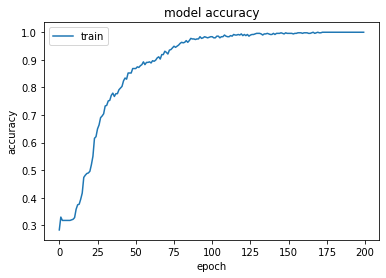

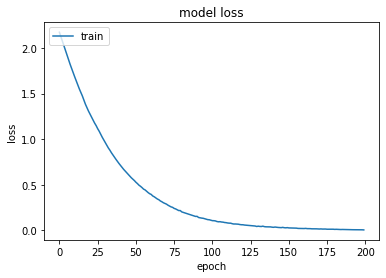

In [ ]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=200
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
)
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
3/3 [==============================] - 0s 2ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9758
test loss, test acc: [0.052381955087184906, 0.9757575988769531]
Generate predictions for 3 samples
predictions shape: (330, 9)


In [ ]:
y_pred=np.zeros((len(x_test),),dtype=int)

print(y_pred.shape)
for i in range(len(x_test)):
  prediction=model.predict(x_test[i:i+1])
  y_pred[i]= np.where(prediction == np.max(prediction[0,:]))[1][0]
print(y_pred)
print(predictions)

(330,)
[6 3 4 3 2 2 6 8 6 6 6 2 0 4 6 6 4 3 6 7 6 2 7 2 6 6 0 2 6 3 2 2 0 3 2 5 4
 4 5 3 4 8 3 5 2 6 2 6 4 6 6 5 2 1 5 6 0 3 2 6 6 5 7 6 6 3 6 4 1 4 8 6 2 3
 3 6 4 4 0 2 5 5 3 6 7 4 4 6 6 0 2 6 0 6 2 5 6 6 7 0 6 3 4 4 6 6 2 6 8 3 4
 8 7 6 2 7 6 1 8 4 6 8 6 1 6 1 2 6 8 6 2 4 6 6 2 6 4 6 0 5 6 6 2 6 0 2 6 5
 7 4 2 8 2 2 5 6 4 6 6 6 2 3 0 6 5 2 6 6 0 2 7 4 3 7 2 6 2 3 1 6 3 7 7 6 4
 0 6 7 6 6 6 2 5 4 6 6 6 2 6 6 1 2 3 6 6 8 6 3 6 6 6 3 4 2 3 4 4 2 7 2 2 3
 4 3 3 4 0 3 5 5 6 3 0 2 3 1 4 5 6 2 6 4 6 6 6 3 6 2 2 1 2 3 1 6 0 6 2 4 6
 8 2 4 1 2 2 4 6 7 7 4 6 6 2 5 6 2 2 4 6 5 8 4 6 2 5 6 3 0 5 2 5 1 2 2 1 6
 3 6 7 3 2 5 6 4 1 6 8 8 2 8 0 8 0 6 6 5 5 5 4 7 4 4 3 6 1 6 0 3 5 6]
[[2.1008984e-05 1.4978648e-18 3.1773995e-09 ... 9.9995494e-01
  5.9072964e-31 9.1175428e-26]
 [7.7955281e-12 1.3166931e-04 8.2417670e-11 ... 1.2624546e-13
  1.0804823e-04 4.3730328e-10]
 [4.4419430e-08 6.4837262e-02 1.3829889e-07 ... 6.4082667e-12
  2.4330604e-04 6.2963026e-09]
 ...
 [3.5460755e-15 1.2407808e-04 9.0264367

In [ ]:
print(predictions[7])

[4.5954814e-13 6.3255839e-03 5.5090198e-04 1.8516533e-07 8.6843279e-08
 7.0382737e-15 4.1826709e-16 4.7195452e-15 9.9312323e-01]


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

[[20  0  2  0  0  0  2  0  0]
 [ 0 12  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 27  1  0  0]
 [ 0  0  0  0  0  0 98  0  0]
 [ 0  3  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0      1.000     0.833     0.909        24
           1      0.800     1.000     0.889        12
           2      0.965     1.000     0.982        55
           3      1.000     1.000     1.000        35
           4      1.000     1.000     1.000        41
           5      1.000     0.964     0.982        28
           6      0.970     1.000     0.985        98
           7      1.000     0.857     0.923        21
           8      1.000     1.000     1.000        16

    accuracy                          0.976       330
   macro avg      0.971     0.962     0.963       330
weighted avg      0.978     0.976     0.975       330

